# ARIMA

In [1]:
import os

In [6]:
root = os.path.abspath('../data/')
calendar_pth = os.path.join(root, 'calendar.csv')
sales_train_eval_pth = os.path.join(root, 'sales_train_evaluation.csv')
sales_train_val_pth = os.path.join(root, 'sales_train_validation.csv')
sample_submission_pth = os.path.join(root, 'sample_submission.csv')
sell_prices_pth = os.path.join(root, 'sell_prices.csv')

In [7]:
import pandas as pd

In [8]:
calendar = pd.read_csv(calendar_pth)
sales_train_eval = pd.read_csv(sales_train_eval_pth)
sales_train_val = pd.read_csv(sales_train_val_pth)
sample_submission = pd.read_csv(sample_submission_pth)
sell_prices = pd.read_csv(sell_prices_pth)

In [17]:
sales_train_eval

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [ ]:
sales_train_eval.loc[sales_train_eval.cat_id == 'FOODS', sales_train_eval.columns.str.contains('d_')]

In [32]:
(sales_train_val.loc[:, sales_train_val.columns.str.contains('d_')].sum(axis=1)
                .sort_values(ascending=False))

8412     250502
18055    192835
21104    150122
8908     134386
2314     127203
          ...  
26276        16
20192        16
27606        13
6048         12
6682         10
Length: 30490, dtype: int64

In [35]:
sales_train_val.loc[8412]

id          FOODS_3_090_CA_3_validation
item_id                     FOODS_3_090
dept_id                         FOODS_3
cat_id                            FOODS
store_id                           CA_3
                       ...             
d_1909                               88
d_1910                               77
d_1911                              141
d_1912                              139
d_1913                              130
Name: 8412, Length: 1919, dtype: object

<AxesSubplot:>

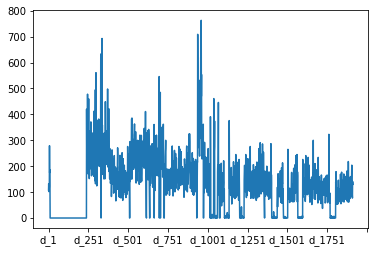

In [34]:
sales_train_val.loc[8412, sales_train_val.columns.str.contains('d_')].plot()

In [10]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


Last `28` days is the test time series.